In [1]:
# Importando bibliotecas
import pandas as pd
import statistics as sts
import seaborn as srn

In [10]:
# Importando dados
dataset = pd.read_csv('../csv/clima_nivel2.csv')

# Vendo head do csv
dataset.head()

,Cidade,Temperatura,Umidade,Chuva,Vento
0,São Paulo,25,80.0,sim,forte
1,Rio,200,50.0,nao,fraco
2,BH,22,-10.0,sim,NaN
3,Curitiba,18,90.0,menos,moderado
4,Recife,30,105.0,não,forte


In [11]:
# Vendo se ha valores nulos e duplicados
dupli = dataset.duplicated().sum()
print(f'\nDuplicados: {dupli}')

dataset.isnull().sum()


Duplicados: 0


Cidade         0
Temperatura    0
Umidade        1
Chuva          0
Vento          1
dtype: int64

- 0 duplicados e 2 nulos

# Temperatura

Text(0.5, 1.0, 'Temperaturas')

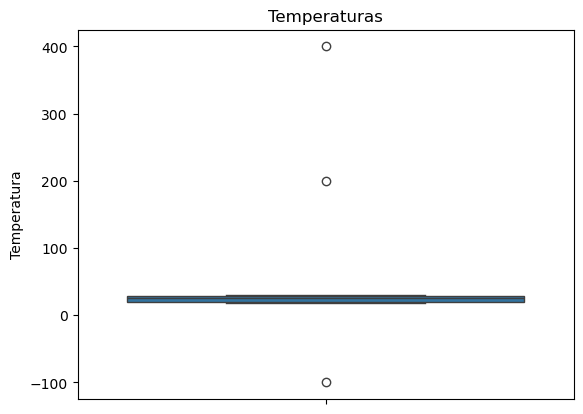

In [12]:
# Análisando gráfico
srn.boxplot(dataset["Temperatura"]).set_title("Temperaturas")

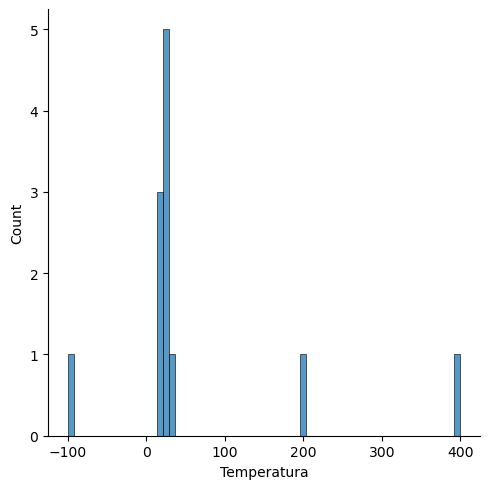

In [13]:
srn.displot(dataset["Temperatura"]).set_titles("Temperaturas")

Pontos específicos:
- Temperaturas em -100, 200 e 400 graus
- Restante aparenta estar na média aceitável para o Brasil

In [ ]:
# Conferindo se os dados batem com os gráficos!
dataset.loc[(dataset["Temperatura"] < -50)|(dataset["Temperatura"] > 60)]

,Cidade,Temperatura,Umidade,Chuva,Vento
1,Rio,200,50.0,nao,fraco
5,Salvador,-100,70.0,sim,MENOS
10,Goiânia,400,30.0,menos,fraco


In [19]:
# Pegando a mediana das temperaturas
mediana = sts.median(dataset["Temperatura"])
mediana

25.5

In [ ]:
# Substituindo valores anormais pela mediana
dataset.loc[(dataset["Temperatura"] < -50)|(dataset["Temperatura"] > 60), "Temperatura"] = mediana

In [ ]:
# Verificando se todos valores foram trocados
dataset.loc[(dataset["Temperatura"] < -50)|(dataset["Temperatura"] > 60)]

,Cidade,Temperatura,Umidade,Chuva,Vento,Temperatua


# Umidade

Text(0.5, 1.0, 'Umidade')

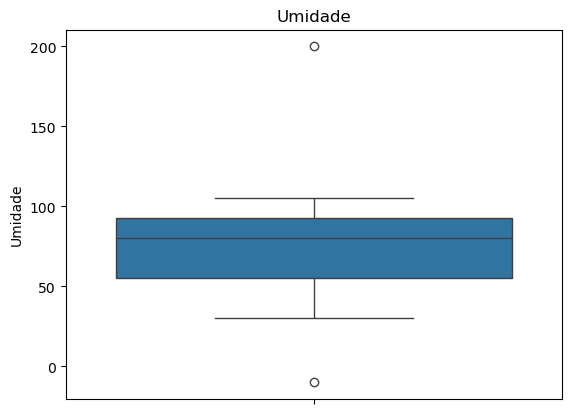

In [29]:
# Analisando gráficos
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

Pontos a averiguar:
- Umidade menor que 0 e maior que 100

In [31]:
# Vendo os valores que estão fora da margem
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100)]

,Cidade,Temperatura,Umidade,Chuva,Vento,Temperatua
2,BH,22.0,-10.0,sim,NaN,NaN
4,Recife,30.0,105.0,não,forte,NaN
11,Natal,26.0,200.0,sim,Moderado,NaN


In [33]:
# Pegando a mediana da umidade
mediana = sts.median(dataset["Umidade"])
mediana

82.5

In [34]:
# Substuindo valores
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100), "Umidade"] = mediana

In [36]:
# Conferindo
dataset.loc[(dataset["Umidade"] < 0)|(dataset["Umidade"] > 100)]

,Cidade,Temperatura,Umidade,Chuva,Vento,Temperatua


In [39]:
# Colocando a mediana nos valores vazios
dataset.fillna({"Umidade": mediana}, inplace=True)

# VENTO

In [37]:
# Verificando os grupos 
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
Fraco       1
MENOS       1
Moderado    1
fort        1
forte       2
fraco       2
moderado    3
dtype: int64

Pontuações:
- Categorias discrepantes

In [43]:
# Padronizando as categorias
dataset.loc[dataset["Vento"].isin(['moderado','Moderado']), "Vento"] = "MODERADO".upper()

In [44]:
dataset.loc[dataset["Vento"].isin(['fraco','Fraco']), "Vento"] = 'FRACO'.upper()

In [45]:
dataset.loc[dataset["Vento"].isin(['fort','forte']), "Vento"] = 'FORTE'.upper()

In [ ]:
# Verificando agrupado agora
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
FORTE       3
FRACO       3
MENOS       1
MODERADO    4
dtype: int64

In [49]:
# Pegando a moda
moda = sts.mode(dataset["Vento"]) 
moda

'MODERADO'

In [50]:
# Substituindo menos pela moda
dataset.loc[dataset["Vento"] == 'MENOS', "Vento"] = moda

In [ ]:
# Ultima verificação dos grupos
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
FORTE       3
FRACO       3
MODERADO    5
dtype: int64

In [55]:
# Verificando os valores NaN
dataset["Vento"].isnull().sum()

1

In [57]:
#Substituindo NaN pela moda
dataset.fillna({"Vento":moda}, inplace=True)

In [53]:
# Trazendo head para baixo para ver melhor
dataset.head()

,Cidade,Temperatura,Umidade,Chuva,Vento,Temperatua
0,São Paulo,25.0,80.0,sim,FORTE,NaN
1,Rio,25.5,50.0,nao,FRACO,25.5
2,BH,22.0,82.5,sim,NaN,NaN
3,Curitiba,18.0,90.0,menos,MODERADO,NaN
4,Recife,30.0,82.5,não,FORTE,NaN


- Deletando coluna criada sem querer

In [ ]:
# Ignore
dataset = dataset.drop(columns=["Temperatua"])

KeyError: "['Temperatua'] not found in axis"

In [61]:
# Verificando se foi deletado
dataset.head()

,Cidade,Temperatura,Umidade,Chuva,Vento
0,São Paulo,25.0,80.0,sim,FORTE
1,Rio,25.5,50.0,nao,FRACO
2,BH,22.0,82.5,sim,MODERADO
3,Curitiba,18.0,90.0,menos,MODERADO
4,Recife,30.0,82.5,não,FORTE


# Chuva

In [63]:
# Verificando as categorias
agrupado = dataset.groupby(["Chuva"]).size()
agrupado

Chuva
N        1
S        1
Sim      1
menos    2
nao      2
não      1
sim      4
dtype: int64

- Padronizar itens

In [64]:
# Padronizando itens
dataset.loc[dataset["Chuva"].isin(['N', 'nao', 'não']), "Chuva"] = "NÃO".upper()

In [65]:
dataset.loc[dataset["Chuva"].isin(['S','Sim','sim']), "Chuva"] = 'SIM'.upper()

In [67]:
# Verificando os grupos
agrupado = dataset.groupby(["Chuva"]).size()
agrupado

Chuva
NÃO      4
SIM      6
menos    2
dtype: int64

In [69]:
# Substituindo o 'menos' pela moda
# Pegando moda
moda = sts.mode(dataset['Chuva'])
moda

'SIM'

In [71]:
# Substituindo 
dataset.loc[dataset['Chuva'] == 'menos', "Chuva"] = moda

In [73]:
# Verificando os grupos
agrupado = dataset.groupby(["Chuva"]).size()
agrupado

Chuva
NÃO    4
SIM    8
dtype: int64

In [74]:
# analizando se tem valores nulos
dataset["Chuva"].isnull().sum()

0